In [405]:
# General libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Draw inline
%matplotlib inline

# Set seaborn style
sns.set_context("notebook", font_scale=1.5)

# Sklearn preprocessing
from sklearn.preprocessing import OneHotEncoder

# Sklearn libraries.
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [406]:
# Load full data set (combined with actions)
train = pd.read_csv('./train_combined_actions.zip')
print("train shape:", train.shape)

c:\Users\cendy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


train shape: (213451, 541)


## Shuffle and Split Data

In [407]:
np.random.seed(0)

# Shuffle training set
shuffle = np.random.permutation(np.arange(train.shape[0]))
train = train.reindex(shuffle)

# Split labels from training set
labels = train['country_destination']
train_nolab = train.drop('country_destination', axis=1)

# split into train and dev sets (12%)
dev_data, dev_labels = train_nolab[:25000], labels[:25000]
train_data, train_labels = train_nolab[25000:], labels[25000:]

print("train data shape:", train_data.shape)
print("train label shape:", train_labels.shape)
print("dev data shape:", dev_data.shape)
print("dev label shape:", dev_labels.shape)

train data shape: (188451, 540)
train label shape: (188451,)
dev data shape: (25000, 540)
dev label shape: (25000,)


In [297]:
# use training set without action counts -- less columns to process and action counts are sparse
col = train_data.columns.get_loc("last_action") # last column index before action columns begin
train_data = train_data.iloc[: , :col+1]
dev_data = dev_data.iloc[: , :col+1]

# drop ID column 
train_data.drop('id',axis=1, inplace=True)
dev_data.drop('id',axis=1, inplace=True)

print("train data w/out actions shape:", train_data.shape)
print("dev data w/out actions shape:", dev_data.shape)

print("\ncolumn names:", list(train_data))

train data w/out actions shape: (188451, 25)
dev data w/out actions shape: (25000, 25)

column names: ['date_account_created', 'timestamp_first_active', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'month_created', 'season_created', 'year_created', 'bin_age', 'bin_lang', 'days_since_creation', 'first_hour', 'count_actions', 'number_devices', 'longest_session', 'total_time', 'last_action']


In [283]:
# Include users with session information only

# Filter out people with no sessions data
mod_train = train[train.count_actions.isnull() != True]

# Shuffle training set
shuffle = np.random.permutation(np.arange(mod_train.shape[0]))
mod_train = mod_train.reindex(shuffle)

# Split labels from training set
mod_labels = mod_train['country_destination']
train_nolab = mod_train.drop('country_destination', axis=1)

# split into train and dev sets (12%)
dev_data_mod, dev_labels_mod = train_nolab[:8850], mod_labels[:8850]
train_data_mod, train_labels_mod = train_nolab[8850:], mod_labels[8850:]

print("train data shape:", train_data_mod.shape)
print("train label shape:", train_labels_mod.shape)
print("dev data shape:", dev_data_mod.shape)
print("dev label shape:", dev_labels_mod.shape)

# use training set without action counts -- less columns to process and action counts are sparse
col = train_data_mod.columns.get_loc("last_action") # last column index before action columns begin
train_data_mod = train_data_mod.iloc[: , :col+1]
dev_data_mod = dev_data_mod.iloc[: , :col+1]

# drop ID column 
train_data_mod.drop('id',axis=1, inplace=True)
dev_data_mod.drop('id',axis=1, inplace=True)

print("train data w/out actions shape:", train_data_mod.shape)
print("dev data w/out actions shape:", dev_data_mod.shape)

print("\ncolumn names:", list(train_data_mod))


train data shape: (64965, 540)
train label shape: (64965,)
dev data shape: (8850, 540)
dev label shape: (8850,)
train data w/out actions shape: (64965, 25)
dev data w/out actions shape: (8850, 25)

column names: ['date_account_created', 'timestamp_first_active', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'month_created', 'season_created', 'year_created', 'bin_age', 'bin_lang', 'days_since_creation', 'first_hour', 'count_actions', 'number_devices', 'longest_session', 'total_time', 'last_action']


33042    NaN
8096     NaN
24516    NaN
18116    NaN
50731    NaN
45102    NaN
25350    NaN
27177    NaN
53155    NaN
16586    NaN
22889    NaN
40694    NaN
13597    NaN
41123    NaN
55316    NaN
32122    NaN
20380    NaN
54656    NaN
34187    NaN
44318    NaN
57833    NaN
54557    NaN
53487    NaN
12682    NaN
332      NaN
13971    NaN
34013    NaN
41039    NaN
48676    NaN
31397    NaN
        ... 
72868    NaN
39118    NaN
2833     NaN
69665    NaN
47826    NaN
10019    NaN
50422    NaN
33454    NaN
14767    NaN
18270    NaN
55523    NaN
27664    NaN
64865    NaN
38629    NaN
66069    NaN
42164    NaN
41440    NaN
3022     NaN
23817    NaN
59014    NaN
34958    NaN
16582    NaN
18350    NaN
20961    NaN
1832     NaN
11808    NaN
10627    NaN
19899    NaN
37482    NaN
10095    NaN
Name: country_destination, dtype: object

## Data Exploration

### Labels (country_destination)

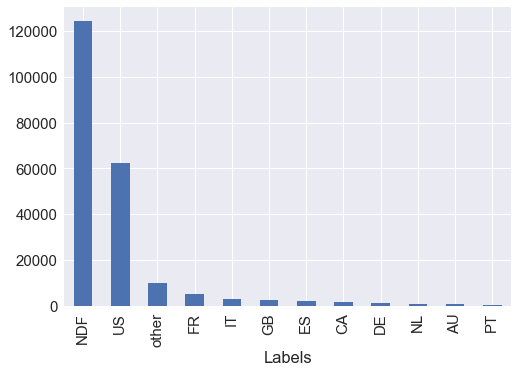

In [5]:
# Exploring labels
labels.value_counts(dropna=False).plot(kind='bar')
plt.xlabel('Labels')

In [404]:
round(labels.value_counts()/sum(labels.value_counts()) * 100,2)

NDF      58.35
US       29.22
other     4.73
FR        2.35
IT        1.33
GB        1.09
ES        1.05
CA        0.67
DE        0.50
NL        0.36
AU        0.25
PT        0.10
Name: country_destination, dtype: float64

### Language & Language Bins

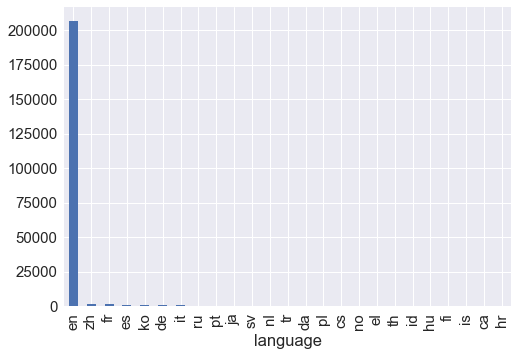

In [6]:
train.language.value_counts(dropna=False).plot(kind='bar')
plt.xlabel('language')

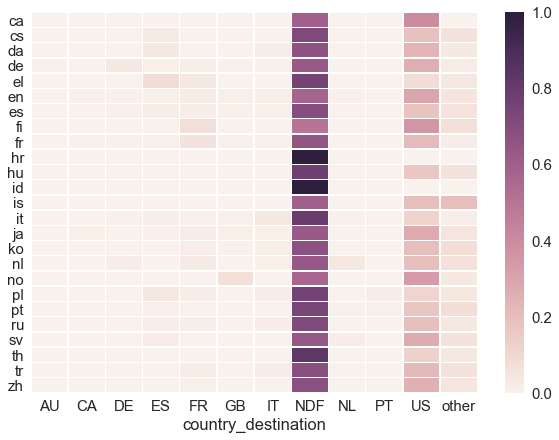

In [7]:
# Table of language vs country_destination
lang_dest = pd.crosstab(index=train["language"], 
                        columns=train["country_destination"])

lang_dest.index= np.asarray(np.unique(train['language']))
# lang_dest = lang_dest.drop('NDF', axis=1)

lang_dest['sum'] = lang_dest.sum(axis=1)
perc_langdest = round(lang_dest.loc[:,"AU":"other"].div(lang_dest["sum"], axis=0),3)

plt.figure(figsize=(10,7))
sns.heatmap(perc_langdest, linewidth=0.5)

In [8]:
print(lang_dest.to_string())

country_destination   AU    CA    DE    ES    FR    GB    IT     NDF   NL   PT     US  other     sum
ca                     0     0     0     0     0     0     0       3    0    0      2      0       5
cs                     0     0     0     1     0     0     0      23    0    0      6      2      32
da                     0     0     0     2     0     0     1      39    0    0     14      2      58
de                     3     1    24     7    10     5     6     462    2    1    193     18     732
el                     0     0     0     2     1     0     0      18    0    0      2      1      24
en                   531  1412  1016  2183  4882  2284  2763  119650  744  210  60845   9794  206314
es                     0     0     6    20    18     6     9     640    1    2    166     47     915
fi                     0     0     0     0     1     0     0       7    0    0      5      1      14
fr                     2     7     8    11    69    12    11     773    4    2    254     1

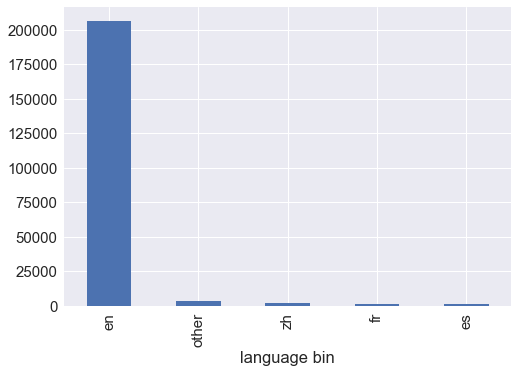

In [9]:
train.bin_lang.value_counts(dropna=False).plot(kind='bar')
plt.xlabel('language bin')

### Gender

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64


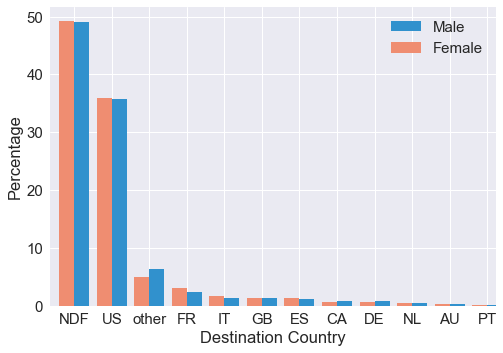

In [10]:
print(train.gender.value_counts())
sum_f = sum(train['gender'] == 'FEMALE')
sum_m = sum(train['gender'] == 'MALE')

fem = train.loc[train['gender'] == 'FEMALE', 'country_destination'].value_counts() / sum_f * 100
mal = train.loc[train['gender'] == 'MALE', 'country_destination'].value_counts() / sum_m * 100

# Bar width
width = 0.4

mal.plot(kind='bar', width=width, color='#3191cd', position=0, label='Male', rot=0)
fem.plot(kind='bar', width=width, color='#ef8d71', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

### Age and Age Bins

In [285]:
sns.distplot(train.age.dropna()[train.age < 120])
plt.xlabel('Age')
sns.despine()

NameError: name 'd' is not defined

Suspicious bump in centenarians. People beyond 120 years old seem to capture a year (e.g. '2014') and are probably erroneous 'ages'. 

Do people of similar age groups travel similarly? 

In [284]:
age0 = 18
age1 = 35
age2 = 55
age3 = 70

teens = train.loc[train['age'] < age0, 'country_destination'].value_counts()
adult = train.query('age > @age0 & age < @age1').country_destination.value_counts()
working = train.query('age > @age1 & age < @age2').country_destination.value_counts()
older = train.query('age > @age2 & age < @age3').country_destination.value_counts()
senior = train.loc[train['age'] > age3, 'country_destination'].value_counts()

teens_dest = teens / sum(teens) * 100
adult_dest = adult / sum(adult) * 100
working_dest = working / sum(working) * 100
older_dest = older / sum(older) * 100
senior_dest = senior / sum(senior) * 100

# Bar width
width = 0.1

plt.figure(figsize=(12,4))
teens_dest.plot(kind='bar', width=width, color='#F7DC6F', position=0, label='Teens')
adult_dest.plot(kind='bar', width=width, color='#82E0AA', position=1, label='Adult')
working_dest.plot(kind='bar', width=width, color='#138D75', position=2, label='Working')
older_dest.plot(kind='bar', width=width, color='#85C1E9', position=3, label='Older')
senior_dest.plot(kind='bar', width=width, color='#BB8FCE', position=4, label='Senior')


plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

pd.DataFrame(dict(teens = teens, adult = adult, working = working, older = older, senior = senior)).reset_index()

NameError: name 'd' is not defined

In [13]:
print(train.age.describe())
print("\nNaN age:", sum(train.age.isnull()))
print("Age over 120:", sum(train.age > 120))
print("\nAge over 120 detail:")
print(train.age[train['age'] > 120].head(5)) # Erroneous ages that seem to capture year

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

NaN age: 87990
Age over 120: 781

Age over 120 detail:
18354     2014.0
147250    2014.0
71849     2014.0
35279     2014.0
178116    2008.0
Name: age, dtype: float64


Unknown    90361
30-45      59310
Under30    37978
45-65      22120
100+        3682
Name: bin_age, dtype: int64

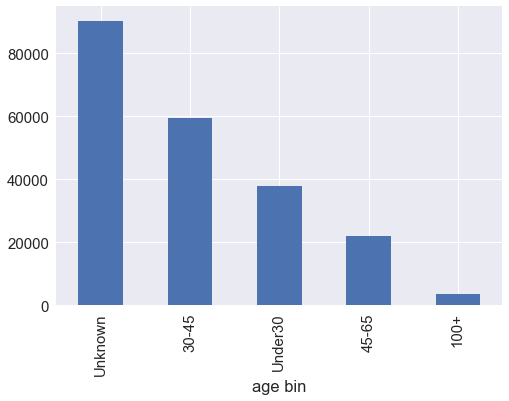

In [14]:
train.bin_age.value_counts(dropna=True).plot(kind='bar')
plt.xlabel('age bin')
train.bin_age.value_counts()

### First Browser

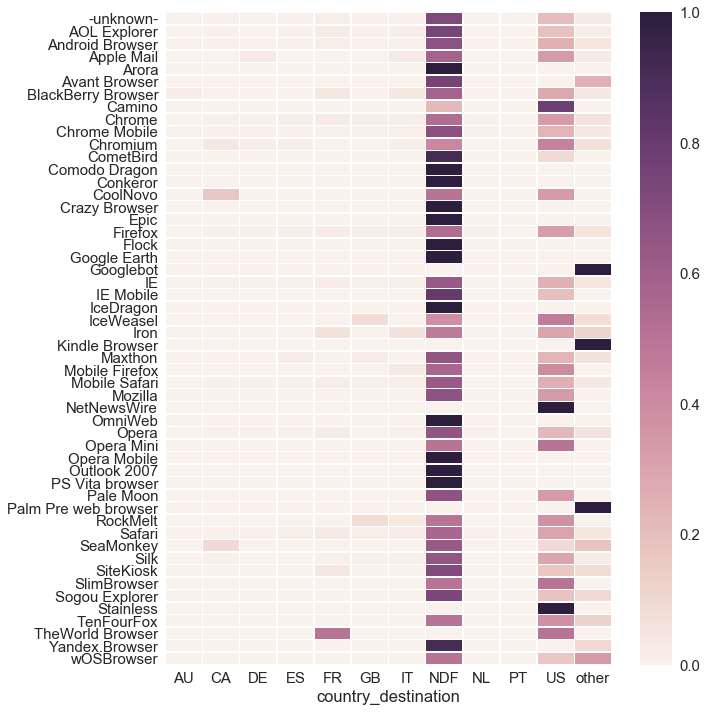

In [15]:
# Table of browser vs country_destination
browser = pd.crosstab(index=train["first_browser"], 
                      columns=train["country_destination"])

browser.index= np.asarray(np.unique(train['first_browser']))

browser['sum'] = browser.sum(axis=1)
p_browser = round(browser.loc[:,"AU":"other"].div(browser["sum"], axis=0),3)

plt.figure(figsize=(10,12))
sns.heatmap(p_browser, linewidth=0.5)

In [16]:
print(browser.to_string())

country_destination    AU   CA   DE   ES    FR   GB   IT    NDF   NL  PT     US  other    sum
-unknown-              39   98   76  158   358  160  190  19648   56  17   5628    838  27266
AOL Explorer            0    1    0    1     6    1    3    182    0   0     46      5    245
Android Browser         1    3    2    5    10    2    4    571    2   0    212     39    851
Apple Mail              0    0    1    0     0    0    1     21    0   0     12      1     36
Arora                   0    0    0    0     0    0    0      1    0   0      0      0      1
Avant Browser           0    0    0    0     0    0    0      3    0   0      0      1      4
BlackBerry Browser      1    0    0    0     2    0    2     31    0   0     15      2     53
Camino                  0    0    0    0     0    0    0      2    0   0      7      0      9
Chrome                154  486  361  755  1535  742  897  33968  260  73  21061   3553  63845
Chrome Mobile           2    5    5    5    14    9   10    

### Signup Method

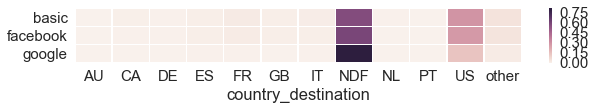

In [17]:
# Table of signup_method vs country_destination
signup = pd.crosstab(index=train["signup_method"], 
                      columns=train["country_destination"])

signup.index= np.asarray(np.unique(train['signup_method']))

signup['sum'] = signup.sum(axis=1)
p_signup = round(signup.loc[:,"AU":"other"].div(signup["sum"], axis=0),3)

plt.figure(figsize=(10,1))
sns.heatmap(p_signup, linewidth=0.5)

### First Device Type

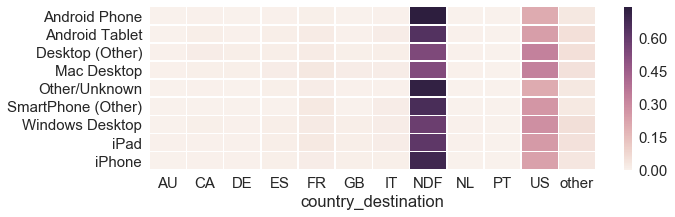

In [18]:
# Table of first_device_type vs country_destination
device = pd.crosstab(index=train["first_device_type"], 
                      columns=train["country_destination"])

device.index= np.asarray(np.unique(train['first_device_type']))

device['sum'] = device.sum(axis=1)
p_device = round(device.loc[:,"AU":"other"].div(device["sum"], axis=0),3)

plt.figure(figsize=(10,3))
sns.heatmap(p_device, linewidth=0.5)

### Month Account Created

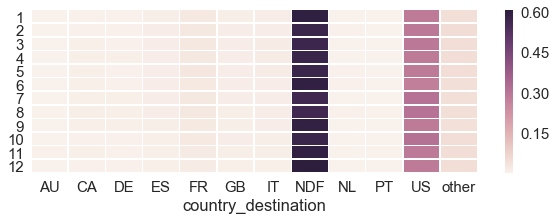

In [19]:
# Table of first_device_type vs country_destination
month = pd.crosstab(index=train["month_created"], 
                      columns=train["country_destination"])

month.index= np.asarray(np.unique(train['month_created']))

month['sum'] = month.sum(axis=1)
p_month = round(month.loc[:,"AU":"other"].div(month["sum"], axis=0),3)

plt.figure(figsize=(10,3))
sns.heatmap(p_month, linewidth=0.5)

In [20]:
print(month.to_string())

country_destination  AU   CA   DE   ES   FR   GB   IT    NDF   NL  PT    US  other    sum
1                    54   73   79  152  384  157  223  10476   47  13  5033    804  17495
2                    44   79   70  182  410  191  209   9558   67  15  4874    883  16582
3                    41  122   96  232  510  239  341  11655   67  22  5989   1011  20325
4                    34  157  122  284  587  278  349  12601   75  21  6336   1023  21867
5                    64  219  132  306  715  304  416  14957  121  34  7400   1244  25912
6                    47  221  130  348  610  310  361  16377  114  34  7604   1266  27422
7                    23  107   90  174  314  156  188   7802   41  10  4291    636  13832
8                    41  127   92  162  383  148  200   8229   73  16  4497    643  14611
9                    43  101   99  153  342  158  189   9143   50  18  4458    641  15395
10                   41   74   53   90  292  144  139   7751   39  13  4199    641  13476
11        

### First Hour

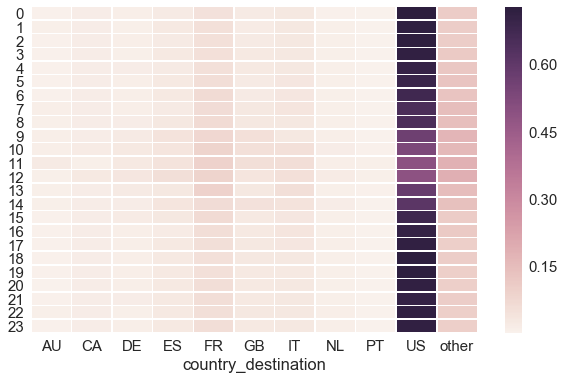

In [21]:
# Table of first_device_type vs country_destination
hour = pd.crosstab(index=train["first_hour"], 
                      columns=train["country_destination"])

hour.index= np.asarray(np.unique(train['first_hour']))

hour = hour.drop('NDF', axis=1) # drop 'NDF' column for better visualization
# hour = hour.drop('US', axis=1) # drop 'US' column for better visualization
hour['sum'] = hour.sum(axis=1)
p_hour = round(hour.loc[:,"AU":"other"].div(hour["sum"], axis=0),3)

plt.figure(figsize=(10,6))
sns.heatmap(p_hour, linewidth=0.5)

In [22]:
print(hour.to_string())

country_destination  AU   CA  DE   ES   FR   GB   IT  NL  PT    US  other   sum
0                    32   72  56  106  246  102  148  30  11  3628    543  4974
1                    31   84  37  113  233   93  147  30   9  3301    486  4564
2                    28   77  51   91  217   97  133  36  12  3141    454  4337
3                    26   63  42  123  240  112  137  38   6  3332    532  4651
4                    32   95  70  120  277  138  147  47  13  3724    640  5303
5                    31   76  51  121  288  114  168  41  14  3560    658  5122
6                    25   70  43   98  269   89  145  32  13  2812    541  4137
7                    31   38  34   64  172   86  104  20   8  1838    414  2809
8                    16   29  26   46  112   49   55  16   3  1099    244  1695
9                    11   13  24   42   79   53   33  10   3   588    179  1035
10                    8   13  16   24   59   33   34  12   4   353    108   664
11                   13    4  15   27   

### Count of Actions

count    73815.000000
mean        75.024819
std        112.543174
min          1.000000
25%         13.000000
50%         38.000000
75%         91.000000
max       2644.000000
Name: count_actions, dtype: float64

Count NaN: 139636


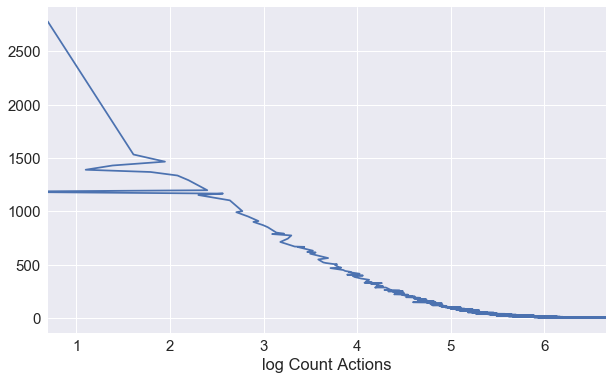

In [23]:
print(train.count_actions.describe())
print('\nCount NaN:', sum(train.count_actions.isnull())) # many null values for people we dont have sessions data on

plt.figure(figsize=(10, 6))
np.log(train.count_actions).value_counts(dropna=True).plot(kind='line')
plt.xlabel('log Count Actions')

### Affiliate channel

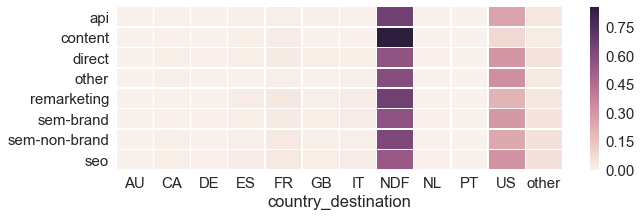

In [24]:
np.unique(train['affiliate_channel'])

# Table of affiliate_channel vs country_destination
aff = pd.crosstab(index=train["affiliate_channel"],
                  columns=train["country_destination"])

aff.index= np.asarray(np.unique(train['affiliate_channel']))

aff['sum'] = aff.sum(axis=1)
p_aff = round(aff.loc[:,"AU":"other"].div(aff["sum"], axis=0),3)

plt.figure(figsize=(10,3))
sns.heatmap(p_aff, linewidth=0.5)

In [25]:
print(aff.to_string())

country_destination   AU   CA   DE    ES    FR    GB    IT    NDF   NL   PT     US  other     sum
api                   17   30   22    56    87    60    50   5382   20    1   2124    318    8167
content                7   17    5    26    57     7    21   3390    8    1    327     82    3948
direct               363  945  699  1536  3294  1579  1858  78329  503  144  41725   6752  137727
other                 10   70   35    34   115    44    63   5361   12    8   2969    240    8961
remarketing            1    7    5    21    35    13    17    728    2    1    225     41    1096
sem-brand             65  154  137   278   669   329   463  14951  103   37   7725   1134   26045
sem-non-brand         59  147  112   180   533   193   242  11694   80   17   4552   1035   18844
seo                   17   58   46   118   233    99   121   4708   34    8   2729    492    8663


### Last Action

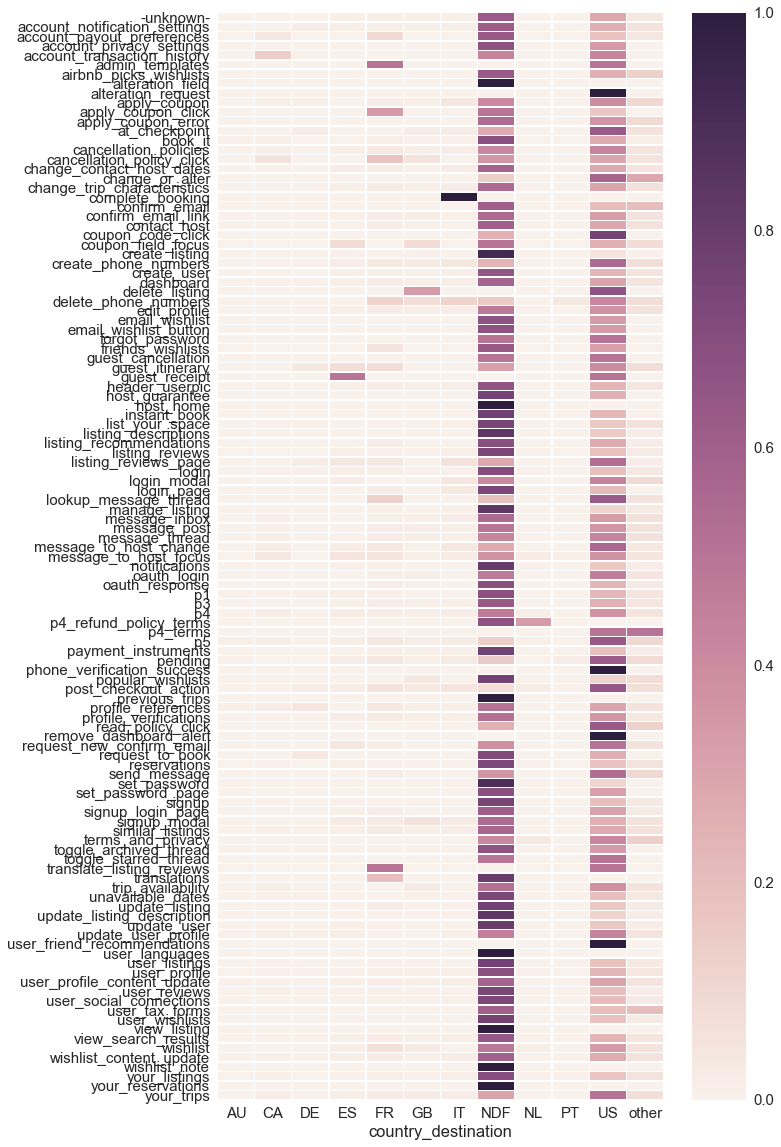

In [26]:
t = train[train['last_action'].isnull() == False]
np.unique(t['last_action'])

# Table of affiliate_channel vs country_destination
action = pd.crosstab(index=t['last_action'],
                     columns=t["country_destination"])

action.index= np.asarray(np.unique(t['last_action']))

action['sum'] = action.sum(axis=1)
p_act = round(action.loc[:,"AU":"other"].div(action["sum"], axis=0),3)

plt.figure(figsize=(10,20))
sns.heatmap(p_act, linewidth=0.5)

In [27]:
print(action.to_string())

country_destination            AU  CA  DE  ES   FR   GB   IT   NDF  NL  PT    US  other    sum
-unknown-                      16  59  33  87  149   94  102  6405  25  15  2906    410  10301
account_notification_settings   0   0   3   2    2    2    2   100   0   0    42     10    163
account_payout_preferences      0   1   0   0    2    0    0    14   0   0     4      1     22
account_privacy_settings        0   0   0   0    0    0    0     4   0   0     2      0      6
account_transaction_history     0   1   0   0    0    0    0     3   0   0     3      0      7
admin_templates                 0   0   0   0    1    0    0     0   0   0     1      0      2
airbnb_picks_wishlists          0   0   0   0    0    0    0     5   0   0     2      1      8
alteration_field                0   0   0   0    0    0    0     1   0   0     0      0      1
alteration_request              0   0   0   0    0    0    0     0   0   0     1      0      1
apply_coupon                    0   1   1   0    2

## Encode Data

In [315]:
# Output 3 classes: NDF, US, Non-US
def country(col):
    if col == 'NDF':
        return "NDF"
    elif col == 'US':
        return 'US'
    else:
        return 'non-US'
    
t = train_labels.apply(country)
d = dev_labels.apply(country)

In [325]:
# Convert labels to numeric
le = preprocessing.LabelEncoder() # Initialize label_encoder
t_lab, d_lab = le.fit_transform(t), le.fit_transform(d)

print(t_lab.shape)
print(d_lab.shape)

(188451,)
(25000,)


# KNN

### Is language predictive?

In [210]:
# Convert language to numeric
code_lang = le.fit_transform(train_data.language)
dev_lang = le.fit_transform(dev_data.language)

In [30]:
code_lang.reshape((188451,1))
dev_lang.reshape((25000,1))

array([[4],
       [4],
       [4],
       ..., 
       [4],
       [4],
       [4]], dtype=int64)

In [31]:
print("K Nearest Neighbors:")
f1 = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(code_lang.reshape((188451,1)), train_lab)
    preds = knn.predict(dev_lang.reshape((25000,1)))
    f1_score = metrics.f1_score(dev_lab, preds, average = "weighted")
    f1.append(f1_score)
    print("k: %r  f1 score: %.4f" %(k, f1_score))
print("Optimal k:", f1.index(max(f1))+1)

K Nearest Neighbors:


c:\Users\cendy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


k: 1  f1 score: 0.4320
k: 2  f1 score: 0.4322
k: 3  f1 score: 0.4325
k: 4  f1 score: 0.4332
k: 5  f1 score: 0.4331
k: 6  f1 score: 0.4331
k: 7  f1 score: 0.4331
k: 8  f1 score: 0.4331
k: 9  f1 score: 0.4331
Optimal k: 4


### What about language and age?

In [64]:
# Create language and age array for train and dev sets
lang = code_lang.reshape((188451,1))
age = train_data.age.reshape((188451,1))

dev_lang = dev_lang.reshape((25000,1))
dev_age = dev_data.age.reshape((25000,1))

# fill NaNs in age with mean age
mean_age = np.nanmean(age)
age = np.where(np.isnan(age), mean_age, age)
dev_age = np.where(np.isnan(dev_age), mean_age, dev_age)

tr = np.concatenate((lang, age), axis=1)
dev = np.concatenate((dev_lang, dev_age), axis=1)


print("K Nearest Neighbors:")
f1 = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(tr, train_lab)
    preds = knn.predict(dev)
    f1_score = metrics.f1_score(dev_lab, preds, average = "weighted")
    f1.append(f1_score)
    print("k: %r  f1 score: %.4f" %(k, f1_score))
print("Optimal k:", f1.index(max(f1))+1)

c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


K Nearest Neighbors:


c:\Users\cendy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


k: 1  f1 score: 0.4886
k: 2  f1 score: 0.4581
k: 3  f1 score: 0.4666
k: 4  f1 score: 0.4663
k: 5  f1 score: 0.4730
k: 6  f1 score: 0.4745
k: 7  f1 score: 0.4753
k: 8  f1 score: 0.4678
k: 9  f1 score: 0.4641
Optimal k: 1


### Language and bin_age? 

In [68]:
# Convert bin_age to numeric
tr_bin_age = le.fit_transform(train_data.bin_age)
dev_bin_age = le.fit_transform(dev_data.bin_age)

# Create language and bin_age array for train and dev sets
lang = code_lang.reshape((188451,1))
bin_age = tr_bin_age.reshape((188451,1))

dev_lang = dev_lang.reshape((25000,1))
dev_bin_age = dev_bin_age.reshape((25000,1))

tr = np.concatenate((lang, bin_age), axis=1)
dev = np.concatenate((dev_lang, dev_bin_age), axis=1)


print("K Nearest Neighbors:")
f1 = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(tr, train_lab)
    preds = knn.predict(dev)
    f1_score = metrics.f1_score(dev_lab, preds, average = "weighted")
    f1.append(f1_score)
    print("k: %r  f1 score: %.4f" %(k, f1_score))
print("Optimal k:", f1.index(max(f1))+1)

K Nearest Neighbors:


c:\Users\cendy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


k: 1  f1 score: 0.4315
k: 2  f1 score: 0.4177
k: 3  f1 score: 0.4322
k: 4  f1 score: 0.4333
k: 5  f1 score: 0.4335
k: 6  f1 score: 0.4336
k: 7  f1 score: 0.4335
k: 8  f1 score: 0.4336
k: 9  f1 score: 0.4335
Optimal k: 6


In [72]:
# create param: new age bin
def new_age(col):
    if col >= age3 and col < 120:
        return "senior"
    elif col >= age2 and col < age3:
        return "older"
    elif col >=age1 and col < age2:
        return "working"
    elif col >=age0 and col < age1:
        return "adult"
    elif col >= 0 and col < age0:
        return "teens"
    else:
        return "unknown"
    
train_data["new_age"] = train.age.apply(new_age)
dev_data["new_age"] = train.age.apply(new_age)

date_account_created  timestamp_first_active     gender    age  \
76594            2013-05-12          20130512210934  -unknown-    NaN   
63080            2013-03-02          20130302054534     FEMALE   31.0   
4949             2011-05-17          20110517211429  -unknown-  105.0   
129089           2013-12-02          20131202180650  -unknown-   37.0   
122626           2013-11-07          20131107183734     FEMALE   25.0   
85227            2013-06-20          20130620041107     FEMALE   26.0   
49549            2012-11-23          20121123122454  -unknown-    NaN   
3014             2011-01-22          20110122230445     FEMALE   35.0   
103611           2013-08-30          20130830170502  -unknown-    NaN   
172907           2014-04-07          20140407225228  -unknown-    NaN   
91188            2013-07-15          20130715160316       MALE   34.0   
157160           2014-02-26          20140226152810       MALE   32.0   
78939            2013-05-23          20130523031202  -unknown-   19.0   
31322            2012-07-10          20120710215508       MALE    NaN   
211734           2014-06-27          20140627185435     FEMALE   23.0   
6875             2011-07-25          20110725195903  -unknown-    NaN   
124143           2013-11-13          20131113071432     FEMALE   29.0   
76486            2013-05-12          20130512011325       MALE   44.0   
204265           2014-06-13          20140613213030     FEMALE   29.0   
113616           2013-10-02          20131002172642  -unknown-    NaN   
196454           2014-05-29          20140529040332  -unknown-    NaN   
81157            2013-06-02          20130602211632     FEMALE   40.0   
25620            2012-05-28          20120528070745  -unknown-   25.0   
176371           2014-04-16          20140416054951       MALE   35.0   
32762            2012-07-19          20120719185848       MALE   31.0   
127585           2013-11-25          20131125213715       MALE   29.0   
189889           2014-05-15          20140515212338     FEMALE   47.0   
20336            2012-04-03          20120403045955     FEMALE   33.0   
119904           2013-10-28          20131028003731       MALE   37.0   
100339           2013-08-18          20130818151043  -unknown-    NaN   
...                     ...                     ...        ...    ...   
168691           2014-03-28          20140328024706  -unknown-    NaN   
70608            2013-04-12          20130412180506  -unknown-    NaN   
67699            2013-03-28          20130328053743  -unknown-    NaN   
169876           2014-03-31          20140331124023  -unknown-   18.0   
137993           2014-01-04          20140104071354  -unknown-    NaN   
82457            2013-06-08          20130608065855       MALE   36.0   
101201           2013-08-21          20130821133417       MALE   28.0   
108631           2013-09-18          20130918050132  -unknown-    NaN   
150055           2014-02-06          20140206194544  -unknown-    NaN   
163302           2014-03-14          20140314213027       MALE   35.0   
17089            2012-02-16          20120216101300       MALE   45.0   
80186            2013-05-29          20130529032026  -unknown-    NaN   
52620            2012-12-17          20121217180858       MALE   25.0   
170584           2014-04-02          20140402015327     FEMALE   28.0   
48600            2012-11-14          20121114225228  -unknown-    NaN   
212038           2014-06-28          20140628043920  -unknown-    NaN   
211543           2014-06-27          20140627061821  -unknown-   28.0   
112420           2013-09-29          20130929072009     FEMALE    NaN   
186098           2014-05-08          20140508023750       MALE   28.0   
86293            2013-06-25          20130625020142       MALE   29.0   
122579           2013-11-07          20131107111554     FEMALE   30.0   
41993            2012-09-22          20120922171335  -unknown-    NaN   
97639            2013-08-08          20130808085357  -unknown-   

### What about language and new_age bin?

In [73]:
# Convert new_age to numeric
tr_new_age = le.fit_transform(train_data.new_age)
dev_new_age = le.fit_transform(dev_data.new_age)

# Create language and bin_age array for train and dev sets
lang = code_lang.reshape((188451,1))
new_age = tr_new_age.reshape((188451,1))

dev_lang = dev_lang.reshape((25000,1))
dev_new_age = dev_new_age.reshape((25000,1))

tr = np.concatenate((lang, new_age), axis=1)
dev = np.concatenate((dev_lang, dev_new_age), axis=1)


print("K Nearest Neighbors:")
f1 = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(tr, train_lab)
    preds = knn.predict(dev)
    f1_score = metrics.f1_score(dev_lab, preds, average = "weighted")
    f1.append(f1_score)
    print("k: %r  f1 score: %.4f" %(k, f1_score))
print("Optimal k:", f1.index(max(f1))+1)

K Nearest Neighbors:


c:\Users\cendy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


k: 1  f1 score: 0.4331
k: 2  f1 score: 0.4331
k: 3  f1 score: 0.4334
k: 4  f1 score: 0.4336
k: 5  f1 score: 0.4334
k: 6  f1 score: 0.4334
k: 7  f1 score: 0.4333
k: 8  f1 score: 0.4330
k: 9  f1 score: 0.4330
Optimal k: 4


### Is bin_language more predictive?

In [32]:
# Convert language to numeric
code_binlang = le.fit_transform(train_data.bin_lang)
dev_binlang = le.fit_transform(dev_data.bin_lang)

# K Nearest Neighbors
print("K Nearest Neighbors:")
f1 = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(code_binlang.reshape((188451,1)), train_lab)
    preds = knn.predict(dev_binlang.reshape((25000,1)))
    f1_score = metrics.f1_score(dev_lab, preds, average = "weighted")
    f1.append(f1_score)
    print("k: %r  f1 score: %.4f" %(k, f1_score))
print("Optimal k:", f1.index(max(f1))+1)

K Nearest Neighbors:


c:\Users\cendy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


k: 1  f1 score: 0.1501
k: 2  f1 score: 0.1718
k: 3  f1 score: 0.4342
k: 4  f1 score: 0.0470
k: 5  f1 score: 0.0403
k: 6  f1 score: 0.1679
k: 7  f1 score: 0.1777
k: 8  f1 score: 0.4342
k: 9  f1 score: 0.1679
Optimal k: 3


# Logistic Regression

### Binarized Language only

In [348]:
# binarize language variable on train and dev data
lang_dum = pd.get_dummies(train.language)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

In [349]:
# Execute logistic regression on binarized language 
print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t_lang, t_lab)
    score = lm.score(d_lang, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t_lang, t_lab)
    score = lm.score(d_lang, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d_lang)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040

Logistic Regression with l2
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040
[[14651  7272  3077]
 [    0     0     0]
 [    0     0     0]]


### Binarized bin_lang

In [350]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

In [351]:
# Execute logistic regression on binarized bin_lang 
print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 100, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t_lang, t_lab)
    score = lm.score(d_lang, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t_lang, t_lab)
    score = lm.score(d_lang, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d_lang)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 50.000000, score: 0.586040
C: 100.000000, score: 0.586040

Logistic Regression with l2
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040
[[14651  7272  3077]
 [    0     0     0]
 [    0     0     0]]


### Binarized bin_lang and bin_age

In [364]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

# binarize bin_age on train and dev data
age_dum = pd.get_dummies(train.bin_age)
t_age = age_dum[25000:]
d_age = age_dum[:25000]

t = np.concatenate((t_lang, t_age), axis = 1)
d = np.concatenate((d_lang, d_age), axis = 1)


In [366]:
# Execute logistic regression on binarized bin_lang 
print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 100, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 50.000000, score: 0.586040
C: 100.000000, score: 0.586040

Logistic Regression with l2
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040
[[14651  7272  3077]
 [    0     0     0]
 [    0     0     0]]


### Binarized bin_lang, bin_age, first_browser

In [374]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

# binarize bin_age on train and dev data
age_dum = pd.get_dummies(train.bin_age)
t_age = age_dum[25000:]
d_age = age_dum[:25000]

# binarize browser on train and dev data
browse_dum = pd.get_dummies(train.first_browser)
t_browse = browse_dum[25000:]
d_browse = browse_dum[:25000]

t = np.concatenate((t_lang, t_age, t_browse), axis = 1)
d = np.concatenate((d_lang, d_age, d_browse), axis = 1)
d.shape

(25000, 62)

In [371]:
# Execute logistic regression on binarized bin_lang, bin_age, first_browser

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 0.500000, score: 0.590680
C: 1.000000, score: 0.590680

Logistic Regression with l2
C: 0.500000, score: 0.590600
C: 1.000000, score: 0.590640
[[12338  4844  2108]
 [ 2313  2428   969]
 [    0     0     0]]


### Binarized bin_lang, bin_age, first_browser, gender

In [375]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

# binarize bin_age on train and dev data
age_dum = pd.get_dummies(train.bin_age)
t_age = age_dum[25000:]
d_age = age_dum[:25000]

# binarize browser on train and dev data
browse_dum = pd.get_dummies(train.first_browser)
t_browse = browse_dum[25000:]
d_browse = browse_dum[:25000]

# binarize gender on train and dev data
gender_dum = pd.get_dummies(train.gender)
t_gender = gender_dum[25000:]
d_gender = gender_dum[:25000]

t = np.concatenate((t_lang, t_age, t_browse, t_gender), axis = 1)
d = np.concatenate((d_lang, d_age, d_browse, d_gender), axis = 1)
d.shape

(25000, 66)

In [376]:
# Execute logistic regression on binarized bin_lang, bin_age, first_browser

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 0.500000, score: 0.596760
C: 1.000000, score: 0.596680

Logistic Regression with l2
C: 0.500000, score: 0.596640
C: 1.000000, score: 0.596640
[[12832  5188  2245]
 [ 1819  2084   832]
 [    0     0     0]]


### Binarized bin_lang, bin_age, first_browser, gender, affiliate provider¶

In [377]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

# binarize bin_age on train and dev data
age_dum = pd.get_dummies(train.bin_age)
t_age = age_dum[25000:]
d_age = age_dum[:25000]

# binarize browser on train and dev data
browse_dum = pd.get_dummies(train.first_browser)
t_browse = browse_dum[25000:]
d_browse = browse_dum[:25000]

# binarize gender on train and dev data
gender_dum = pd.get_dummies(train.gender)
t_gender = gender_dum[25000:]
d_gender = gender_dum[:25000]

# binarize affiliate provider on train and dev data
aff_dum = pd.get_dummies(train.affiliate_provider)
t_aff = aff_dum[25000:]
d_aff = aff_dum[:25000]

t = np.concatenate((t_lang, t_age, t_browse, t_gender, t_aff), axis = 1)
d = np.concatenate((d_lang, d_age, d_browse, d_gender, d_aff), axis = 1)
d.shape

(25000, 84)

In [378]:
# Execute logistic regression on binarized bin_lang, bin_age, first_browser, affiliate

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 0.500000, score: 0.600840
C: 1.000000, score: 0.600800

Logistic Regression with l2
C: 0.500000, score: 0.600840
C: 1.000000, score: 0.600840
[[12641  4892  2164]
 [ 2010  2380   913]
 [    0     0     0]]


### Binarized bin_lang, bin_age, first_browser, gender, affiliate provider, first device

In [389]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

# binarize bin_age on train and dev data
age_dum = pd.get_dummies(train.bin_age)
t_age = age_dum[25000:]
d_age = age_dum[:25000]

# binarize browser on train and dev data
browse_dum = pd.get_dummies(train.first_browser)
t_browse = browse_dum[25000:]
d_browse = browse_dum[:25000]

# binarize gender on train and dev data
gender_dum = pd.get_dummies(train.gender)
t_gender = gender_dum[25000:]
d_gender = gender_dum[:25000]

# binarize affiliate provider on train and dev data
aff_dum = pd.get_dummies(train.affiliate_provider)
t_aff = aff_dum[25000:]
d_aff = aff_dum[:25000]

# binarize device type on train and dev data
device_dum = pd.get_dummies(train.first_device_type)
t_device = device_dum[25000:]
d_device = device_dum[:25000]

t = np.concatenate((t_lang, t_age, t_browse, t_gender, t_aff, t_device), axis = 1)
d = np.concatenate((d_lang, d_age, d_browse, d_gender, d_aff, d_device), axis = 1)
d.shape

(25000, 93)

In [391]:
# Execute logistic regression on binarized bin_lang, bin_age, first_browser, affiliate, first device

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 0.500000, score: 0.602000
C: 1.000000, score: 0.601960

Logistic Regression with l2
C: 0.500000, score: 0.602160
C: 1.000000, score: 0.602160
[[12728  4946  2180]
 [ 1923  2326   897]
 [    0     0     0]]


### Binarized bin_lang, bin_age, first_browser, gender, affiliate provider, first device, first hour

In [394]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

# binarize bin_age on train and dev data
age_dum = pd.get_dummies(train.bin_age)
t_age = age_dum[25000:]
d_age = age_dum[:25000]

# binarize browser on train and dev data
browse_dum = pd.get_dummies(train.first_browser)
t_browse = browse_dum[25000:]
d_browse = browse_dum[:25000]

# binarize gender on train and dev data
gender_dum = pd.get_dummies(train.gender)
t_gender = gender_dum[25000:]
d_gender = gender_dum[:25000]

# binarize affiliate provider on train and dev data
aff_dum = pd.get_dummies(train.affiliate_provider)
t_aff = aff_dum[25000:]
d_aff = aff_dum[:25000]

# binarize device type on train and dev data
device_dum = pd.get_dummies(train.first_device_type)
t_device = device_dum[25000:]
d_device = device_dum[:25000]

# binarize hour on train and dev data
hour_dum = pd.get_dummies(train.first_hour)
t_hour = hour_dum[25000:]
d_hour = hour_dum[:25000]

t = np.concatenate((t_lang, t_age, t_browse, t_gender, t_aff, t_device, t_hour), axis = 1)
d = np.concatenate((d_lang, d_age, d_browse, d_gender, d_aff, d_device, d_hour), axis = 1)
d.shape

(25000, 117)

In [395]:
# Execute logistic regression on binarized bin_lang, bin_age, first_browser, affiliate, first device, first hour

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 100, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 100, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 50.000000, score: 0.602760
C: 100.000000, score: 0.602760

Logistic Regression with l2
C: 50.000000, score: 0.602720
C: 100.000000, score: 0.602720
[[12758  4960  2217]
 [ 1891  2310   860]
 [    2     2     0]]


### Binarized bin_lang, bin_age, first_browser, gender, affiliate provider, first device, first hour, season

In [400]:
# using bin_lang instead of language

# binarize bin_lang on train and dev data
lang_dum = pd.get_dummies(train.bin_lang)
t_lang = lang_dum[25000:]
d_lang = lang_dum[:25000]

# binarize bin_age on train and dev data
age_dum = pd.get_dummies(train.bin_age)
t_age = age_dum[25000:]
d_age = age_dum[:25000]

# binarize browser on train and dev data
browse_dum = pd.get_dummies(train.first_browser)
t_browse = browse_dum[25000:]
d_browse = browse_dum[:25000]

# binarize gender on train and dev data
gender_dum = pd.get_dummies(train.gender)
t_gender = gender_dum[25000:]
d_gender = gender_dum[:25000]

# binarize affiliate provider on train and dev data
aff_dum = pd.get_dummies(train.affiliate_provider)
t_aff = aff_dum[25000:]
d_aff = aff_dum[:25000]

# binarize device type on train and dev data
device_dum = pd.get_dummies(train.first_device_type)
t_device = device_dum[25000:]
d_device = device_dum[:25000]

# binarize hour on train and dev data
hour_dum = pd.get_dummies(train.first_hour)
t_hour = hour_dum[25000:]
d_hour = hour_dum[:25000]

# binarize season on train and dev data
season_dum = pd.get_dummies(train.season_created)
t_season = season_dum[25000:]
d_season = season_dum[:25000]

t = np.concatenate((t_lang, t_age, t_browse, t_gender, t_aff, t_device, t_hour, t_season), axis = 1)
d = np.concatenate((d_lang, d_age, d_browse, d_gender, d_aff, d_device, d_hour, d_season), axis = 1)
d.shape

(25000, 121)

In [401]:
# Execute logistic regression on binarized bin_lang, bin_age, first_browser, affiliate, first device

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 100, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 100, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(t, t_lab)
    score = lm.score(d, d_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(d)
conf = confusion_matrix(pred, d_lab)
print(conf)

Logistic Regression with l1
C: 50.000000, score: 0.601720
C: 100.000000, score: 0.601800

Logistic Regression with l2
C: 50.000000, score: 0.601800
C: 100.000000, score: 0.601720
[[12734  4961  2217]
 [ 1915  2309   860]
 [    2     2     0]]


## Language bin

In [79]:
# Convert language bin to numeric
code_binlang = le.fit_transform(train_data.bin_lang)
dev_binlang = le.fit_transform(dev_data.bin_lang)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 11))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(code_binlang.reshape((188451,1)), train_lab)
    score = lm.score(dev_binlang.reshape((25000,1)), dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 11))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(code_binlang.reshape((188451,1)), train_lab)
    score = lm.score(dev_binlang.reshape((25000,1)), dev_lab)
    print("C: %f, score: %f" %(c, score))

Logistic Regression with l1
C: 0.100000, score: 0.586040
C: 0.200000, score: 0.586040
C: 0.300000, score: 0.586040
C: 0.400000, score: 0.586040
C: 0.500000, score: 0.586040
C: 0.600000, score: 0.586040
C: 0.700000, score: 0.586040
C: 0.800000, score: 0.586040
C: 0.900000, score: 0.586040
C: 1.000000, score: 0.586040

Logistic Regression with l2
C: 0.100000, score: 0.586040
C: 0.200000, score: 0.586040
C: 0.300000, score: 0.586040
C: 0.400000, score: 0.586040
C: 0.500000, score: 0.586040
C: 0.600000, score: 0.586040
C: 0.700000, score: 0.586040
C: 0.800000, score: 0.586040
C: 0.900000, score: 0.586040
C: 1.000000, score: 0.586040


### Language and age (no binning)

In [94]:
# Create language and age array for train and dev sets
lang = code_lang.reshape((188451,1))
age = train_data.age.reshape((188451,1))

dev_lang = dev_lang.reshape((25000,1))
dev_age = dev_data.age.reshape((25000,1))

# fill NaNs in age with mean age
mean_age = np.nanmean(age)
age = np.where(np.isnan(age), mean_age, age)
dev_age = np.where(np.isnan(dev_age), mean_age, dev_age)

tr = np.concatenate((lang, age), axis=1)
dev = np.concatenate((dev_lang, dev_age), axis=1)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1")
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2")
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

pred = lm.predict(dev)
conf = confusion_matrix(pred, dev_lab)
print(conf)

c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Logistic Regression with l1
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040

Logistic Regression with l2
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040
[[    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [   65   162   106   267   551   279   309 14651    89    26  7272  1223]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [

### Language bin and age bin

In [93]:
# Create language and age array for train and dev sets
code_binlang = le.fit_transform(train_data.bin_lang)
dev_binlang = le.fit_transform(dev_data.bin_lang)

# Convert bin_age to numeric
tr_bin_age = le.fit_transform(train_data.bin_age)
dev_bin_age = le.fit_transform(dev_data.bin_age)

lang = code_binlang.reshape((188451,1))
age = tr_bin_age.reshape((188451,1))

dev_lang = dev_binlang.reshape((25000,1))
dev_age = dev_bin_age.reshape((25000,1))

tr = np.concatenate((lang, age), axis=1)
dev = np.concatenate((dev_lang, dev_age), axis=1)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(dev)
conf = confusion_matrix(pred, dev_lab)
print(conf)

Logistic Regression with l1
C: 0.500000, score: 0.578920
C: 1.000000, score: 0.578920

Logistic Regression with l2
C: 0.500000, score: 0.578920
C: 1.000000, score: 0.578920
[[    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [   41    96    62   169   344   188   224 11579    53    17  4378   766]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [   24    66    44    98   207    91    85  3072    36     9  2894   457]
 [

### Language and bin_age

In [89]:
# Create language and age array for train and dev sets
code_lang = le.fit_transform(train_data.language)
dev_lang = le.fit_transform(dev_data.language)

# Convert bin_age to numeric
tr_bin_age = le.fit_transform(train_data.bin_age)
dev_bin_age = le.fit_transform(dev_data.bin_age)

lang = code_lang.reshape((188451,1))
age = tr_bin_age.reshape((188451,1))

dev_lang = dev_lang.reshape((25000,1))
dev_age = dev_bin_age.reshape((25000,1))

tr = np.concatenate((lang, age), axis=1)
dev = np.concatenate((dev_lang, dev_age), axis=1)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 11))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 11))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

Logistic Regression with l1
C: 0.100000, score: 0.578240
C: 0.200000, score: 0.578240
C: 0.300000, score: 0.578240
C: 0.400000, score: 0.578240
C: 0.500000, score: 0.578240
C: 0.600000, score: 0.578240
C: 0.700000, score: 0.578240
C: 0.800000, score: 0.578240
C: 0.900000, score: 0.578240
C: 1.000000, score: 0.578240

Logistic Regression with l2
C: 0.100000, score: 0.578240
C: 0.200000, score: 0.578240
C: 0.300000, score: 0.578240
C: 0.400000, score: 0.578240
C: 0.500000, score: 0.578240
C: 0.600000, score: 0.578240
C: 0.700000, score: 0.578200
C: 0.800000, score: 0.578200
C: 0.900000, score: 0.578200
C: 1.000000, score: 0.578200


### Language, age, browser

In [102]:
# encode language
tr_lang = le.fit_transform(train_data.language)
dev_lang = le.fit_transform(dev_data.language)

# encode browser
tr_brow = le.fit_transform(train_data.first_browser)
dev_brow = le.fit_transform(dev_data.first_browser)

# set up train and dev sets
tr_lang = tr_lang.reshape((188451,1))
tr_age = train_data.age.reshape((188451,1))
tr_brow = tr_brow.reshape((188451,1))

dev_lang = dev_lang.reshape((25000,1))
dev_age = dev_data.age.reshape((25000,1))
dev_brow = dev_brow.reshape((25000,1))

# fill NaNs in age with mean age
mean_age = np.nanmean(age)
tr_age = np.where(np.isnan(tr_age), mean_age, tr_age)
dev_age = np.where(np.isnan(dev_age), mean_age, dev_age)

# tr_brow = np.where(np.isnan(tr_brow), "none", tr_brow)
# dev_brow = np.where(np.isnan(dev_brow), "none", dev_brow)

tr = np.concatenate((tr_lang, tr_age, tr_brow), axis=1)
dev = np.concatenate((dev_lang, dev_age, dev_brow), axis=1)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(dev)
conf = confusion_matrix(pred, dev_lab)
print(conf)


c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Logistic Regression with l1
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040

Logistic Regression with l2
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040
[[    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [   65   162   106   267   551   279   309 14651    89    26  7272  1223]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [

### Language, age, browser, first hour

In [103]:
# encode language
tr_lang = le.fit_transform(train_data.language)
dev_lang = le.fit_transform(dev_data.language)

# encode browser
tr_brow = le.fit_transform(train_data.first_browser)
dev_brow = le.fit_transform(dev_data.first_browser)

# set up train and dev sets
tr_lang = tr_lang.reshape((188451,1))
tr_age = train_data.age.reshape((188451,1))
tr_brow = tr_brow.reshape((188451,1))
tr_hour = train_data.first_hour.reshape((188451,1))

dev_lang = dev_lang.reshape((25000,1))
dev_age = dev_data.age.reshape((25000,1))
dev_brow = dev_brow.reshape((25000,1))
dev_hour = dev_data.first_hour.reshape((25000,1))

# fill NaNs in age with mean age
mean_age = np.nanmean(age)
tr_age = np.where(np.isnan(tr_age), mean_age, tr_age)
dev_age = np.where(np.isnan(dev_age), mean_age, dev_age)

# NaNs in hour with mean hour
mean_hour = np.nanmean(tr_hour)
tr_hour = np.where(np.isnan(tr_hour), mean_hour, tr_hour)
dev_hour = np.where(np.isnan(dev_hour), mean_hour, dev_hour)


tr = np.concatenate((tr_lang, tr_age, tr_brow, tr_hour), axis=1)
dev = np.concatenate((dev_lang, dev_age, dev_brow, dev_hour), axis=1)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(dev)
conf = confusion_matrix(pred, dev_lab)
print(conf)


c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Logistic Regression with l1
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040

Logistic Regression with l2
C: 0.500000, score: 0.586040
C: 1.000000, score: 0.586040
[[    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [   65   162   106   267   551   279   309 14651    89    26  7272  1223]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [

### Language bin, age bin, browser, first hour

In [104]:
# Create language and age array for train and dev sets
code_binlang = le.fit_transform(train_data.bin_lang)
dev_binlang = le.fit_transform(dev_data.bin_lang)

# Convert bin_age to numeric
tr_bin_age = le.fit_transform(train_data.bin_age)
dev_bin_age = le.fit_transform(dev_data.bin_age)

# encode browser
tr_brow = le.fit_transform(train_data.first_browser)
dev_brow = le.fit_transform(dev_data.first_browser)

lang = code_binlang.reshape((188451,1))
age = tr_bin_age.reshape((188451,1))
tr_brow = tr_brow.reshape((188451,1))
tr_hour = train_data.first_hour.reshape((188451,1))

dev_lang = dev_binlang.reshape((25000,1))
dev_age = dev_bin_age.reshape((25000,1))
dev_brow = dev_brow.reshape((25000,1))
dev_hour = dev_data.first_hour.reshape((25000,1))

# NaNs in hour with mean hour
mean_hour = np.nanmean(tr_hour)
tr_hour = np.where(np.isnan(tr_hour), mean_hour, tr_hour)
dev_hour = np.where(np.isnan(dev_hour), mean_hour, dev_hour)

tr = np.concatenate((lang, age, tr_brow, tr_hour), axis=1)
dev = np.concatenate((dev_lang, dev_age, dev_brow, dev_hour), axis=1)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(dev)
conf = confusion_matrix(pred, dev_lab)
print(conf)

c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Logistic Regression with l1
C: 0.500000, score: 0.581600
C: 1.000000, score: 0.581600

Logistic Regression with l2
C: 0.500000, score: 0.581240
C: 1.000000, score: 0.581240
[[    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [   41    97    63   173   351   193   227 11725    54    17  4466   779]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [   24    65    43    94   200    86    82  2926    35     9  2806   444]
 [

### Language bin, age bin, browser, first hour with users that have sessions data only

In [282]:
# encode mod train labels and dev labels
le = preprocessing.LabelEncoder() # Initialize label_encoder
train_lab_mod, dev_lab_mod = le.fit_transform(train_labels_mod), le.fit_transform(dev_labels_mod)

c:\Users\cendy\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


44417    NaN
68309    NaN
69718    NaN
67213    NaN
63379    NaN
53145    NaN
32460    NaN
35906    NaN
18967    NaN
67784    NaN
69564    NaN
1319     NaN
36664    NaN
26201    NaN
63955    NaN
43830    NaN
47508    NaN
46597    NaN
43892    NaN
25460    NaN
38087    NaN
10000    NaN
61692    NaN
42806    NaN
42063    NaN
25475    NaN
55656    NaN
28491    NaN
22742    NaN
61590    NaN
        ... 
45191    NaN
60131    NaN
58426    NaN
30591    NaN
61917    NaN
2213     NaN
48297    NaN
67390    NaN
3995     NaN
4351     NaN
61815    NaN
18703    NaN
68055    NaN
7769     NaN
20568    NaN
21160    NaN
34196    NaN
56714    NaN
57797    NaN
22827    NaN
64617    NaN
4523     NaN
32812    NaN
50697    NaN
17960    NaN
50577    NaN
64039    NaN
69074    NaN
11801    NaN
45274    NaN
Name: country_destination, dtype: object

In [271]:
# Create language and age array for train and dev sets
code_binlang = le.fit_transform(mt.bin_lang)
dev_binlang = le.fit_transform(md.bin_lang)

# Convert bin_age to numeric
tr_bin_age = le.fit_transform(mt.bin_age)
dev_bin_age = le.fit_transform(md.bin_age)

# encode browser
tr_brow = le.fit_transform(mt.first_browser)
dev_brow = le.fit_transform(md.first_browser)

lang = code_binlang.reshape((65115,1))
age = tr_bin_age.reshape((65115,1))
tr_brow = tr_brow.reshape((65115,1))
tr_hour = mt.first_hour.reshape((65115,1))

dev_lang = dev_binlang.reshape((8700,1))
dev_age = dev_bin_age.reshape((8700,1))
dev_brow = dev_brow.reshape((8700,1))
dev_hour = md.first_hour.reshape((8700,1))

# NaNs in hour with mean hour
mean_hour = np.nanmean(tr_hour)
tr_hour = np.where(np.isnan(tr_hour), mean_hour, tr_hour)
dev_hour = np.where(np.isnan(dev_hour), mean_hour, dev_hour)

tr = np.concatenate((lang, age, tr_brow, tr_hour), axis=1)
dev = np.concatenate((dev_lang, dev_age, dev_brow, dev_hour), axis=1)

print("Logistic Regression with l1")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l1", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))

print("\nLogistic Regression with l2")
Cs = {'C':list(np.linspace(0, 1, 3))[1:]}

for c in Cs.get('C'):
    lm = LogisticRegression(C = c, penalty = "l2", multi_class='ovr')
    lm.fit(tr, train_lab)
    score = lm.score(dev, dev_lab)
    print("C: %f, score: %f" %(c, score))
    
pred = lm.predict(dev)
conf = confusion_matrix(pred, dev_lalb)
print(conf)

Logistic Regression with l1


c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
c:\Users\cendy\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


ValueError: Found input variables with inconsistent numbers of samples: [65115, 188451]